In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
pd.set_option('display.max_columns', None)


In [157]:
df=pd.read_csv('kidney_disease.csv')

In [158]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [159]:
df.shape

(400, 26)

In [160]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [162]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Missing Values

In [163]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [164]:
cat_cols=[col for col in df.columns if df[col].dtypes=='O']

In [165]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [166]:
num_cols=[col for col in df.columns if col not in cat_cols and col!='id']

In [167]:
num_cols

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

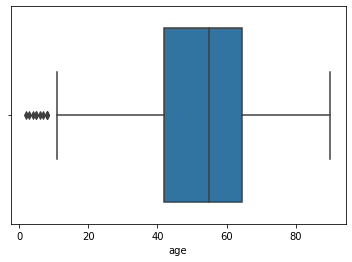

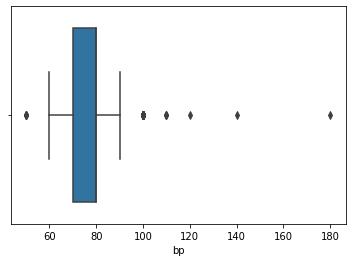

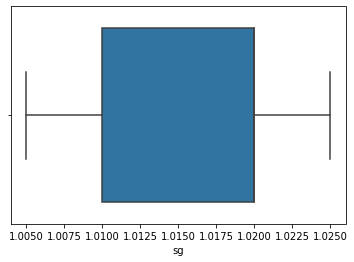

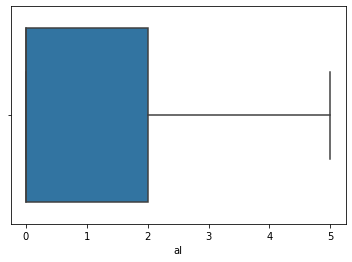

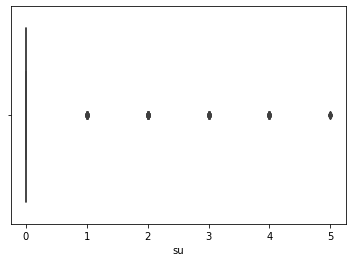

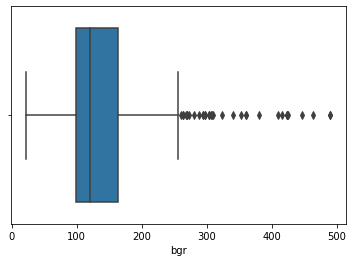

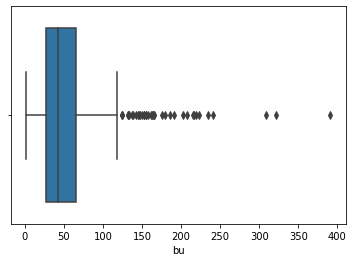

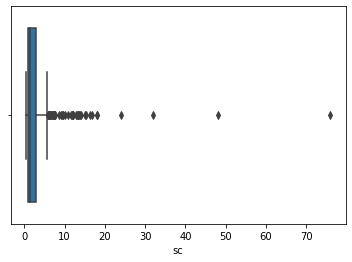

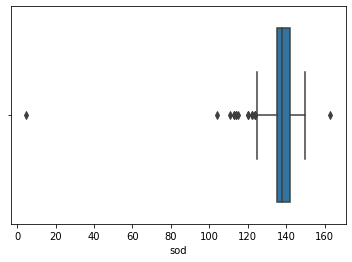

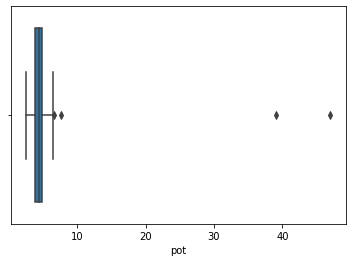

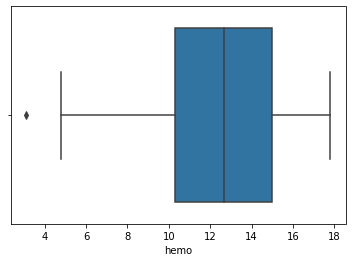

In [168]:
for i,col in enumerate(num_cols):
    plt.figure(i)
    sns.boxplot(df[col])

In [169]:
def fillNaWithMedian(col):
    med=df[col].median()
    df[col].fillna(med,inplace=True)

In [170]:
for col in num_cols:
    fillNaWithMedian(col)

In [171]:
len(cat_cols)

14

In [172]:
len(num_cols)

11

In [173]:
def fillMissingWithCategory(col):
    df[col].fillna('Unknown',inplace=True)

In [174]:
for col in cat_cols:
    fillMissingWithCategory(col)

### Categorical Features Encoding

In [175]:
for col in cat_cols:
    print(df[col].value_counts())

normal      201
Unknown     152
abnormal     47
Name: rbc, dtype: int64
normal      259
abnormal     76
Unknown      65
Name: pc, dtype: int64
notpresent    354
present        42
Unknown         4
Name: pcc, dtype: int64
notpresent    374
present        22
Unknown         4
Name: ba, dtype: int64
Unknown    70
41         21
52         21
48         19
44         19
40         16
43         14
45         13
42         13
33         12
36         12
28         12
50         12
32         12
34         11
37         11
30          9
35          9
46          9
29          9
31          8
39          7
24          7
26          6
38          5
49          4
53          4
47          4
54          4
51          4
27          3
25          3
22          3
23          2
19          2
16          1
20          1
21          1
15          1
9           1
14          1
\t43        1
\t?         1
17          1
18          1
Name: pcv, dtype: int64
Unknown    105
9800        11
6700        10
960

In [176]:
for col in cat_cols:
    df[col]=df[col].map(lambda x:x.strip())

In [177]:
for col in ['wc','rc','pcv']:
    df[col]=np.where(df[col]=='?',0,df[col])
    df[col]=np.where(df[col]=='Unknown',0,df[col])
    df[col]=pd.to_numeric(df[col])

In [178]:
cat_cols=[col for col in df.columns if df[col].dtypes=='O']

In [179]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [180]:
'rc' in cat_cols

False

In [181]:
num_cols=[col for col in df.columns if col not in cat_cols and col!='id']

In [182]:
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [183]:
for col in ['wc','rc','pcv']:
    med=df[col].median()
    df[col]=np.where(df[col]==0,med,df[col])

In [184]:
for col in cat_cols:
    print(df[col].value_counts())

normal      201
Unknown     152
abnormal     47
Name: rbc, dtype: int64
normal      259
abnormal     76
Unknown      65
Name: pc, dtype: int64
notpresent    354
present        42
Unknown         4
Name: pcc, dtype: int64
notpresent    374
present        22
Unknown         4
Name: ba, dtype: int64
no         251
yes        147
Unknown      2
Name: htn, dtype: int64
no         261
yes        137
Unknown      2
Name: dm, dtype: int64
no         364
yes         34
Unknown      2
Name: cad, dtype: int64
good       317
poor        82
Unknown      1
Name: appet, dtype: int64
no         323
yes         76
Unknown      1
Name: pe, dtype: int64
no         339
yes         60
Unknown      1
Name: ane, dtype: int64
ckd       250
notckd    150
Name: classification, dtype: int64


In [185]:
a=list(df['pe'].value_counts().index)
a.remove('Unknown')

In [186]:
cat_cols.remove('classification')


In [187]:
len(cat_cols)

10

In [188]:
for col in cat_cols:
    features=list(df[col].value_counts().index)
    features.remove('Unknown')
    for feature in features:
        df[col+"_"+feature]=np.where(df[col]==feature,1,0)

In [189]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,rbc_normal,rbc_abnormal,pc_normal,pc_abnormal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,Unknown,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
1,1,7.0,50.0,1.020,4.0,0.0,Unknown,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.0,no,no,no,good,no,no,ckd,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.0,no,yes,no,poor,no,yes,ckd,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [190]:
df.drop(cat_cols+['id'],axis=1,inplace=True)

In [191]:
df['classification']=np.where(df['classification']=='ckd',1,0)

### Outliers

In [192]:
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

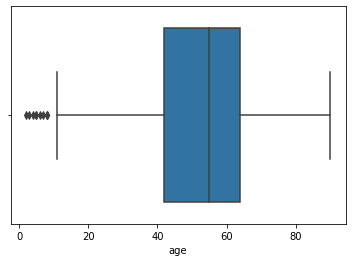

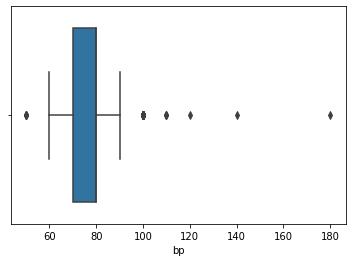

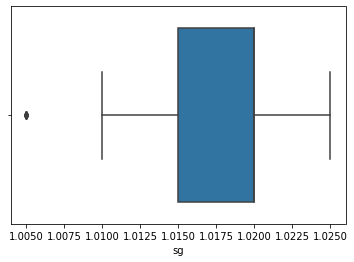

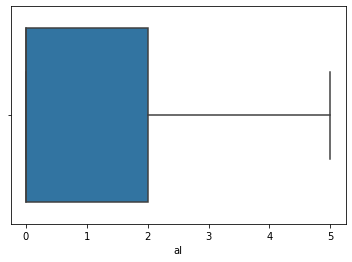

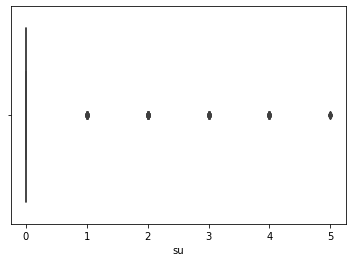

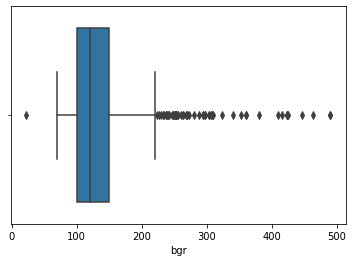

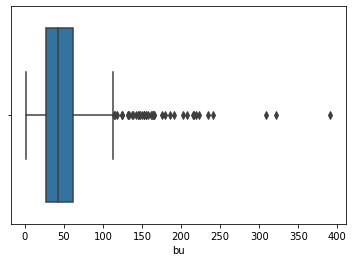

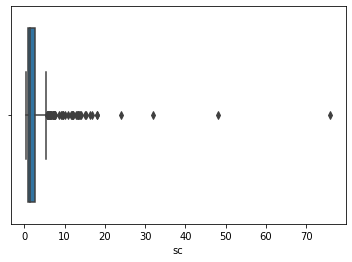

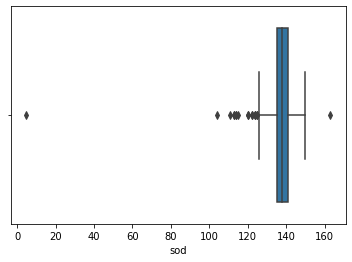

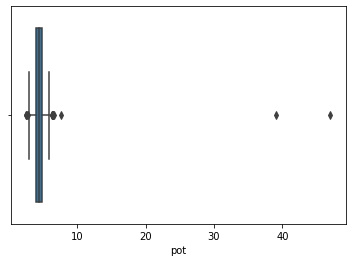

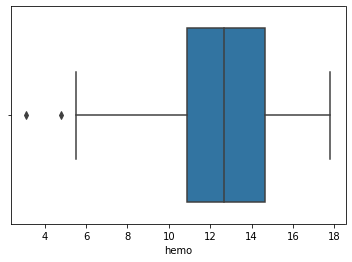

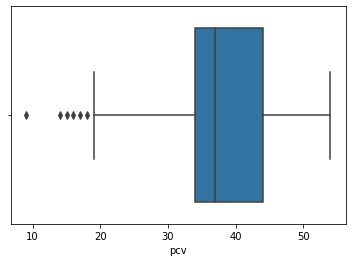

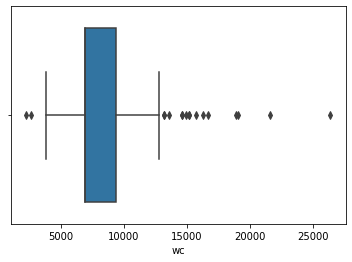

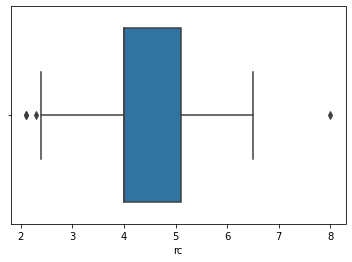

In [193]:
for i,col in enumerate(num_cols):
    plt.figure(i)
    sns.boxplot(df[col])
    

In [194]:
### bmi column contains outliers
def removeOutlier(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange

In [195]:
for col in num_cols:
    low,high=removeOutlier(df[col])
    df[col]=np.where(df[col]>high,high,df[col])
    df[col]=np.where(df[col]<low,low,df[col])

### Feature Selection

<AxesSubplot:>

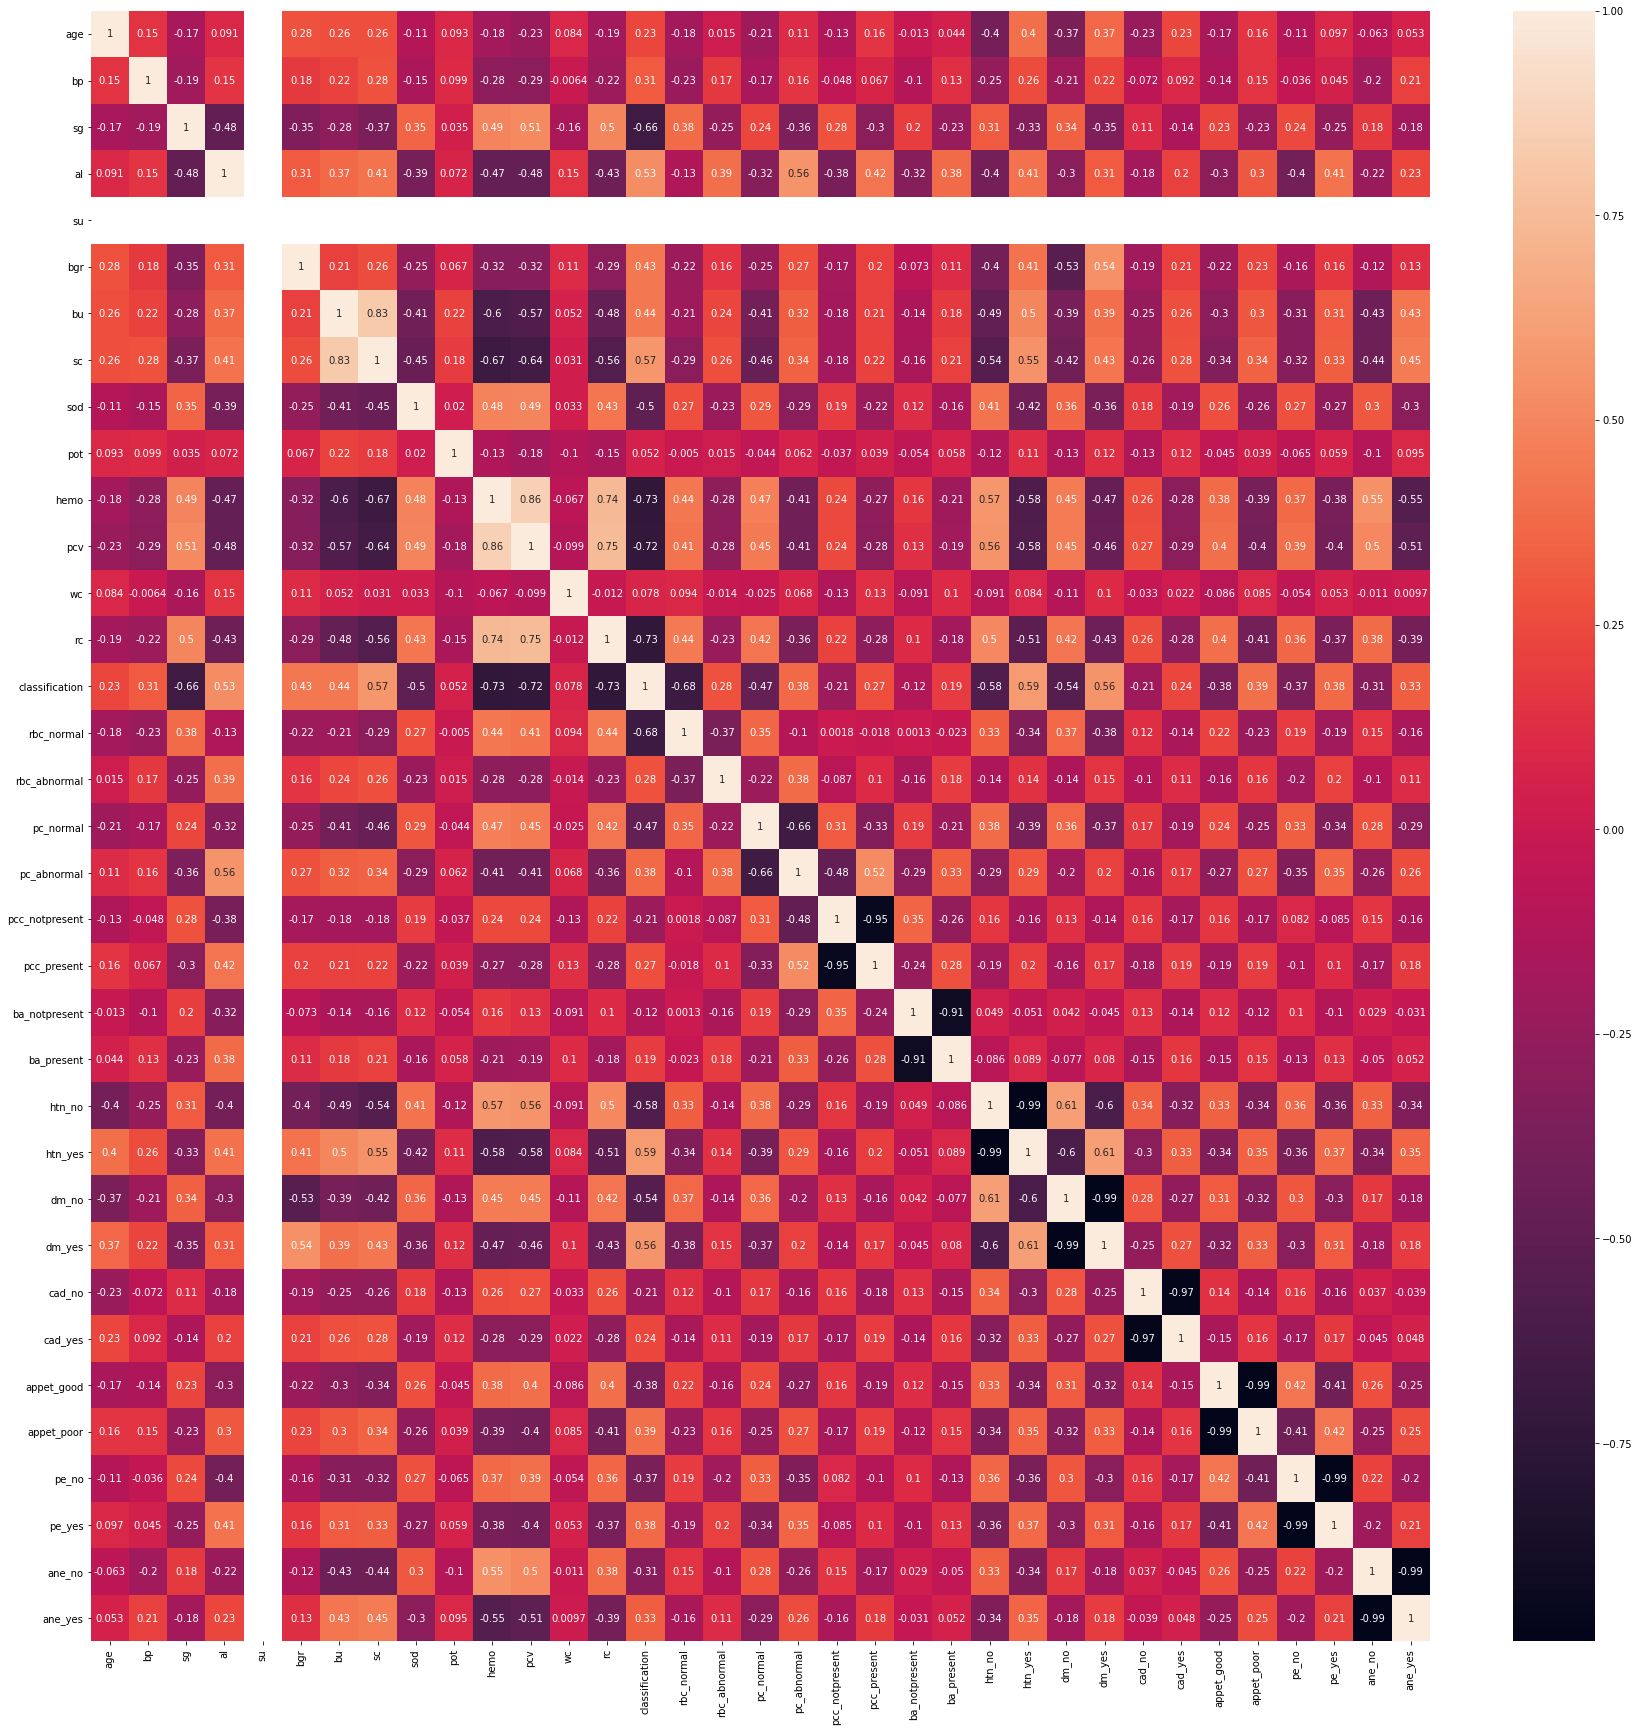

In [196]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [197]:
df.drop(['su','pcv','sc'],axis=1,inplace=True)

### Feature Importance

In [199]:
X=df.drop('classification',axis=1)
y=df['classification']

In [200]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

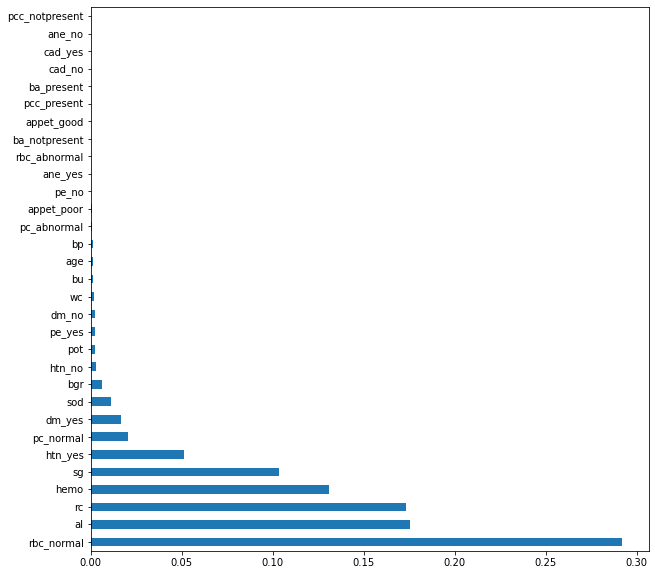

In [201]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(10,10))

feat_imp.sort_values(ascending=False).plot(kind='barh')

In [204]:
feat_imp.sort_values(ascending=False).index

Index(['rbc_normal', 'al', 'rc', 'hemo', 'sg', 'htn_yes', 'pc_normal',
       'dm_yes', 'sod', 'bgr', 'htn_no', 'pot', 'pe_yes', 'dm_no', 'wc', 'bu',
       'age', 'bp', 'pc_abnormal', 'appet_poor', 'pe_no', 'ane_yes',
       'rbc_abnormal', 'ba_notpresent', 'appet_good', 'pcc_present',
       'ba_present', 'cad_no', 'cad_yes', 'ane_no', 'pcc_notpresent'],
      dtype='object')

In [212]:
X=df[['rbc_normal', 'al', 'rc', 'hemo', 'sg', 'htn_yes', 'pc_normal',
       'dm_yes', 'sod', 'bgr', 'htn_no', 'pot', 'pe_yes', 'dm_no', 'wc', 'bu',
       'age', 'bp']]

### Model Building

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [224]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [225]:
X.shape

(400, 18)

In [226]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [227]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 18))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [228]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6802 - accuracy: 0.5587 - val_loss: 0.7054 - val_accuracy: 0.5056
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.5754 - val_loss: 0.6701 - val_accuracy: 0.5393
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.5866 - val_loss: 0.6375 - val_accuracy: 0.5843
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.6592 - val_loss: 0.6104 - val_accuracy: 0.5843
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7095 - val_loss: 0.5886 - val_accuracy: 0.6404
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7374 - val_loss: 0.5680 - val_accuracy: 0.6854
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7877 - val_loss: 0.5499 - val_accuracy: 0.7191
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9721 - val_loss: 0.1369 - val_accuracy: 0.9326
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9721 - val_loss: 0.1336 - val_accuracy: 0.9326
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.9721 - val_loss: 0.1308 - val_accuracy: 0.9326
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9721 - val_loss: 0.1280 - val_accuracy: 0.9326
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9721 - val_loss: 0.1253 - val_accuracy: 0.9438
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9721 - val_loss: 0.1229 - val_accuracy: 0.9438
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9721 - val_loss: 0.1210 - val_accuracy: 0.9438
Epoch 

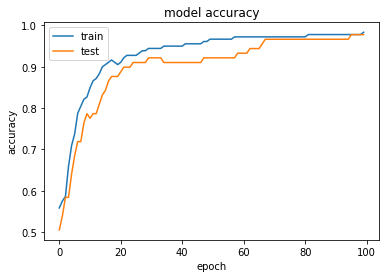

In [229]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

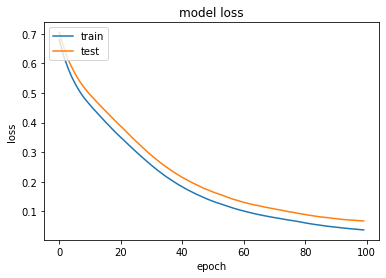

In [230]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [231]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [232]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)



In [233]:
print(cm)
print(score)

[[49  3]
 [ 2 78]]
0.9621212121212122


In [243]:
classifier.save('./classifier.h5')

In [237]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

In [245]:
X_test

array([[ 1.        , -0.67198782, -2.05785531, ...,  2.20933698,
        -0.07352877,  0.43500659],
       [-1.        , -0.67198782,  1.64507527, ..., -0.85091468,
        -0.0155708 , -1.4081834 ],
       [ 1.        , -0.67198782,  0.2564763 , ..., -0.43771614,
         0.67992482, -0.4865884 ],
       ...,
       [-1.        ,  2.47373681, -0.55353976, ..., -0.74761504,
         0.79584075, -0.4865884 ],
       [ 1.        ,  1.68730565, -0.55353976, ..., -0.78204825,
        -2.44980545, -1.4081834 ],
       [ 1.        , -0.67198782,  1.06649236, ..., -0.16225045,
        -0.47923454, -1.4081834 ]])

In [249]:
df[df['classification']==0]

,age,bp,sg,al,bgr,bu,sod,pot,hemo,wc,rc,classification,rbc_normal,rbc_abnormal,pc_normal,pc_abnormal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
250,40.0,80.0,1.025,0.0,140.0,10.0,135.0,5.0,15.0,10400.0,4.5,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
251,23.0,80.0,1.025,0.0,70.0,36.0,150.0,4.6,17.0,9800.0,5.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
252,45.0,80.0,1.025,0.0,82.0,49.0,147.0,4.4,15.9,9100.0,4.7,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
253,57.0,80.0,1.025,0.0,119.0,17.0,135.0,4.7,15.4,6200.0,6.2,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
254,51.0,60.0,1.025,0.0,99.0,38.0,135.0,3.7,13.0,8300.0,5.2,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,140.0,49.0,150.0,4.9,15.7,6700.0,4.9,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
396,42.0,70.0,1.025,0.0,75.0,31.0,141.0,3.5,16.5,7800.0,6.2,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
397,12.0,80.0,1.020,0.0,100.0,26.0,137.0,4.4,15.8,6600.0,5.4,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
398,17.0,60.0,1.025,0.0,114.0,50.0,135.0,4.9,14.2,7200.0,5.9,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
